In [1]:
from site_data_utils.site_analysis import get_info

import osmnx as ox

location = (39.3158421, -102.8736196)

from pygris.geocode import geocode
from Existing_Site_Data.geocode_sites import loc_data


/Users/sampackman/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sampackman/Documents/ev_charging_analysis/site_data_utils/locational_data/get_data.py:5: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  j40_data = read_csv('site_data_utils/locational_data/Justice40/j40_data.csv')


Site Data found for 550/550 locations


In [2]:
address =  '100 Commercial Boulevard Blakeslee'

# ox.geocoder.geocode(address)

In [3]:
from pygris.geocode import geocode as gr_geocode
from osmnx.geocoder import geocode as ox_geocode
coord = ox_geocode(address)


In [4]:
coord

(41.0787704, -75.5798219)

In [5]:
get_info((38.887369907348564, -76.9969075173454), debug = True)

(Income of surrounding areas                                                                                                    133967.0
 Estimated cost of transportation                                                                                                12803.0
 Cost burden for transportation                                                                                                 0.073359
 Proportion of households without vehicles                                                                                          19.5
 Walk times to…Adult Education                                                                                                  32.83738
 Grocery Stores                                                                                                                 1.242072
 Medical Facilities                                                                                                             1.854097
 Parks                                   

In [6]:
# from math import isnan
# isnan(loc_data[loc_data.Address == '1871 Shawano Ave, Green Bay, WI 54303-2633'].Latitude)

In [7]:
# G = ox.graph_from_point(center_point = location, dist = 500, network_type= 'walk')


In [8]:
# # location = (gr_geocode(address).latitude,  gr_geocode(address).longitude)
# print(get_info(address, output = "DataFrame", debug = True)[0]['amenities'])

# ox.lo


In [29]:
coord = (38.88901239651124, -76.99236970466754)

In [30]:
points_of_interest = {}
relevant_amenities = ['restaurant', 'pub', 'bar', 'biergarten', 'cafe', 'fast_food', 'food_court', 'ice_cream', 'library', 'atm', 'bank', 'money_transfer', 'payment_center', 'bureau_de_change', 'payment terminal', 'pharmacy', 'arts_centre', 'cinema', 'community_centre', 'planetarium']
relevant_buildings = ['retail', 'supermarket', 'museum', 'sports_centre', 'sports_hall', 'riding_hall', 'pavilion', 'stadium']
relevant_tourism = ['artwork', 'attraction', 'gallery', 'information', 'museum', 'picnic_site', 'viewpoint', 'zoo', ]


amenity_tags = {'amenity': relevant_amenities,
        'building': relevant_buildings,
        'tourism': relevant_tourism}

# ev_tags = {'amenity': ["charging_station"]}

bus_stop_tags = {'highway': ['bus_stop', 'bus_bay'], 'amenity': ['bus_station']}

bike_rental_tags = {'amenity': ['bicycle_rental']}

subway_tags = {'station': 'subway'}

tags = {"amenities": amenity_tags,
        "bus stops": bus_stop_tags, "bike rentals": bike_rental_tags, "subway stations": subway_tags}



gdf = ox.features.features_from_point(coord, dist=500, tags = amenity_tags)
G = ox.graph_from_point(center_point = coord, dist = 500, network_type= 'walk')
# for key, value in tags.items():
#     try: 


#             num_amenities_euc = len(gdf)

#             num_poi = 0

#             for i in range(num_amenities_euc):
#                 query = f'{gdf["addr:housenumber"].iloc[i]} {gdf["addr:street"].iloc[i]}, {gdf["addr:city"].iloc[i]} {gdf["addr:state"].iloc[i]}, {gdf["addr:postcode"].iloc[i]} '
#                 amenity_loc  = ox.geocoder.geocode(query)
#                 num_poi += test_walking_distance(G, location=location, amenity_loc= amenity_loc, walking_distance = walking_distance, debug = debug)
                    

#     except:
#             num_poi = 0

#     points_of_interest[key] = num_poi


# return pd.concat([pd.Series(points_of_interest)])


In [91]:
import shapely 
import numpy as np
import pandas as pd

gdf_points = gdf.geometry.loc[gdf.geometry.apply(func = isinstance, args = (shapely.geometry.point.Point,))]


great_circle_dist = ox.distance.great_circle(lat1 = coord[0], lon1 = coord[1], lat2 = gdf_points.y, lon2 = gdf_points.x)

very_close = great_circle_dist < 50

node1, dist1 = ox.distance.nearest_nodes(G, X = coord[1], Y = coord[0], return_dist = True)
node2, dist2 = ox.distance.nearest_nodes(G, X = gdf_points.x, Y = gdf_points.y, return_dist = True)

same_node = np.array(node2) == node1

close_amenities = same_node | very_close

remaining = gdf_points.loc[close_amenities == False]
node2_remain = np.array(node2)[close_amenities == False]
dist2_remain = np.array(dist2)[close_amenities == False]


routes = ox.routing.shortest_path(G, [node1] * len(node2_remain), node2_remain, weight='length', cpus=1)


edges = [ox.routing.route_to_gdf(G, route, weight = 'length') for route in routes]
dists = np.array([sum(edgelist['length']) for edgelist in edges])
print(sum(dist1 + dists + dist2_remain  < 500)+ sum(close_amenities) )



3


In [96]:
import geopandas
type(gdf_points)
geopandas.geoseries.GeoSeries(shapely.geometry.point.Point(1,2))

0    POINT (1.00000 2.00000)
dtype: geometry

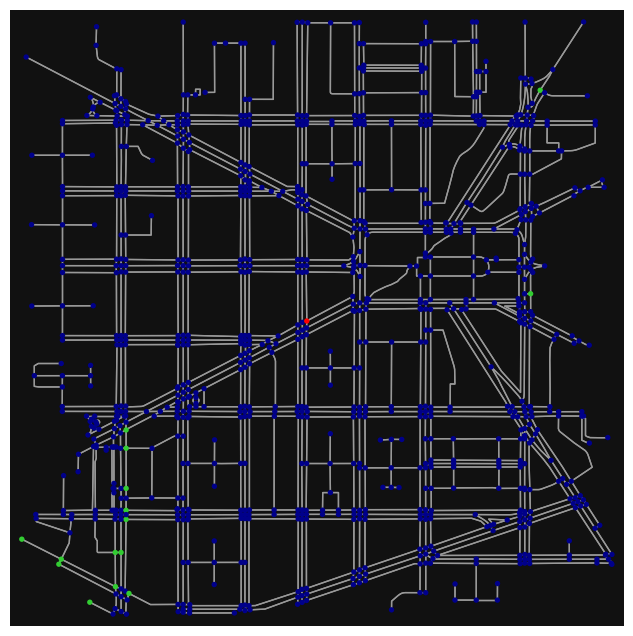

node1 11230223956 
 node2 [11357298433, 655442868, 655442868, 8382480895, 9750028779, 11357298442, 11357298435, 11357298433, 11357299199, 9656842499, 9765084909, 11357298433, 655442868, 9765084906, 9765084905, 655442868, 11357299199, 11357298433, 49889417, 11357298433, 4785019243, 11357298438, 9592649167]


In [92]:
def pick_color(node_id):
    if node_id == node1:
        return 'red'
    elif node_id in node2:
        return 'limegreen'
    return 'darkblue'

ox.plot_graph(G, node_color=[pick_color(node) for node in G.nodes])
print(f'node1 {node1} \n node2 {node2}')

[13.020075619702244,
 1785845.909400062,
 12362590.940686904,
 12362590.940686904,
 12362590.940686904,
 16.42595174173316,
 12362590.940686904,
 12362590.940686904,
 12362590.940686904,
 1786698.1217634196,
 1786696.877133758]

Great Circle Dist 618.7271695185156


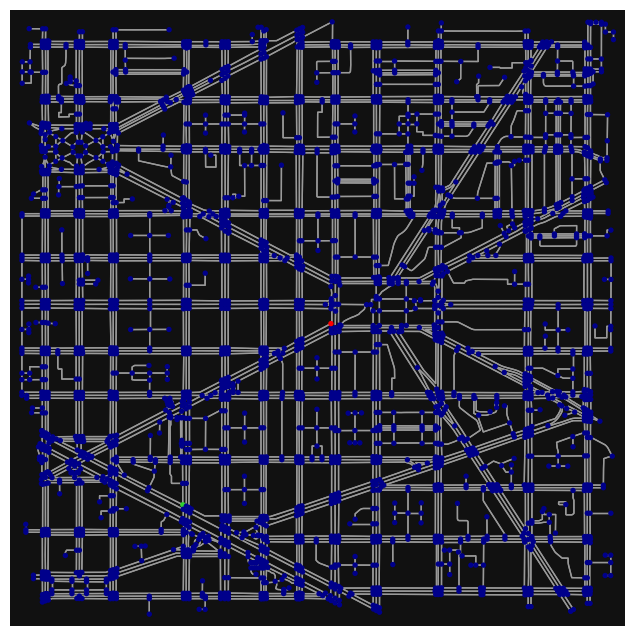

node1 11230223957 
 node2 8382480895
786.3466655767512


In [60]:
from site_data_utils.nearby_amenities import test_walking_distance

location = coord 
test_loc = amenity_loc


print(f'Great Circle Dist {great_circle_dist}')
#if the distance is very short there may be no actual walking path between the nodes even though it is walkable. 


node1, dist1 = ox.distance.nearest_nodes(G, X = location[1], Y = location[0], return_dist = True)

if True:
        def pick_color(node_id):
            if node_id == node1:
                return 'red'
            elif node_id == node2:
                return 'limegreen'
            return 'darkblue'
        
        ox.plot_graph(G, node_color=[pick_color(node) for node in G.nodes])
        print(f'node1 {node1} \n node2 {node2}')

if node1 == node2:
    print('same node')
#if both locations are the same node the walking time is minimal
else:
    route = ox.routing.shortest_path(G, node1, node2, weight='length', cpus=1)
    edges = ox.routing.route_to_gdf(G, route, weight = 'length')

    total_dist = dist1 + sum(edges['length']) + dist2

    print(total_dist)

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                             
node         6488391766  Blakeslee              100         18610         PA   
way          257639584         NaN              NaN           NaN        NaN   
             463135525         NaN              NaN           NaN        NaN   
             463135527   Blakeslee              107         18610         PA   
             463135528         NaN              NaN           NaN        NaN   
             570784079   Blakeslee              117         18610         PA   
             570784427   Blakeslee              127         18610         PA   

                                  addr:street  amenity         brand  \
element_type osmid                                                     
node         6488391766  Commercial Boulevard     fuel        Sunoco   
way          257639584                    NaN  parking           NaN   
             463135525                    NaN  parking           NaN   
             463135527        Parkside Avenue      NaN  Best Western   
             463135528                    NaN  parking           NaN   
             570784079        Parkside Avenue      NaN           NaN   
             570784427        Parkside Avenue   police           NaN   

                        brand:wikidata compressed_air               name  ...  \
element_type osmid                                                        ...   
node         6488391766       Q1423218            yes             Sunoco  ...   
way          257639584             NaN            NaN  Lower Parking Lot  ...   
             463135525             NaN            NaN                NaN  ...   
             463135527         Q830334            NaN       Best Western  ...   
             463135528             NaN            NaN                NaN  ...   
             570784079             NaN            NaN                NaN  ...   
             570784427             NaN            NaN         Fern Ridge  ...   

                                                                     nodes  \
element_type osmid                                                           
node         6488391766                                                NaN   
way          257639584   [2631285616, 2631285309, 2631285282, 263128557...   
             463135525   [4584444839, 8299619514, 4584444840, 548733220...   
             463135527   [4584444844, 4584444845, 5835644010, 109427682...   
             463135528   [4584444848, 4584444849, 4584444850, 458444485...   
             570784079   [5487332210, 5487332211, 5487332212, 548733221...   
             570784427   [5487333299, 5487333300, 5487333301, 548733330...   

                                   branch building            phone    ref  \
element_type osmid                                                           
node         6488391766               NaN      NaN              NaN    NaN   
way          257639584                NaN      NaN              NaN    NaN   
             463135525                NaN      NaN              NaN    NaN   
             463135527   Inn at Blakeslee      yes  +1 570-646-6000  39102   
             463135528                NaN      NaN              NaN    NaN   
             570784079                NaN      yes              NaN    NaN   
             570784427                NaN      yes              NaN    NaN   

                        tourism  \
element_type osmid                
node         6488391766     NaN   
way          257639584      NaN   
             463135525      NaN   
             463135527    hotel   
             463135528      NaN   
             570784079      NaN   
             570784427      NaN   

                                                                   website  \
element_type osmid                                                           
node         6488391766                        

In [14]:
import pandas as pd

d  = pd.DataFrame({
    'a': [1,2,3], 'b': [4,5,6]
})

In [15]:
for i in d:
    print(i)

a
b
